# 19MCS0021 Patel Rutu Manish

## Machine Learning Lab Assessment 5

## MULTINOMIAL NAIVE BAYES FOR BREAST CANCER

In [10]:
# Naive Bayes Multinomial model
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


In [11]:
# read dataset
data = load_breast_cancer()

print(data.target)
print(data.target_names)
X = data.data
y = data.target

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedKFold

num_instances = len(X)
seed = 7
kfold = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
model = MultinomialNB()

for train_index, test_index in kfold.split(X,y):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36
  37  38  39  40  41  42  45  46  47  48  49  50  51  52  53  54  55  57
  58  59  60  61  62  63  65  67  68  69  70  71  72  73  74  75  76  77
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 107 108 109 110 111 112 113 114 115
 116 117 120 123 125 127 128 129 130 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 148 149 150 151 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 174 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 236
 237 238 240 241 242 243 244 245 246 247 249 250 251 252 253 254 255 256
 257 259 261 262 264 265 267 268 269 270 271

In [12]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

from sklearn.model_selection import GridSearchCV
params = {}
gs = GridSearchCV(model, cv=kfold, param_grid=params, return_train_score=True)

models=gs.fit(X_train, y_train)


In [13]:
preds = gs.predict(X_test)
print(preds)

from sklearn.metrics import accuracy_score
print(' Accuracy:',accuracy_score(y_test, preds))

[1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 Accuracy: 0.875


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[18  6]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84        24
           1       0.84      0.97      0.90        32

    accuracy                           0.88        56
   macro avg       0.89      0.86      0.87        56
weighted avg       0.88      0.88      0.87        56



In [15]:
cm=confusion_matrix(y_test, preds)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[18  6]
 [ 1 31]]

True Positives(TP) =  18

True Negatives(TN) =  31

False Positives(FP) =  6

False Negatives(FN) =  1


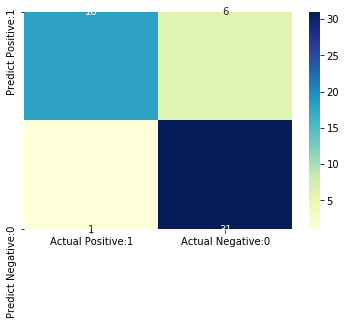

In [17]:
import seaborn as sns
import pandas as pd
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [18]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8750


In [19]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Precision : 0.7500
Recall or Sensitivity : 0.9474


# APRIORI ALGORITHM FOR MARKET-BASKET-OPTIMISATION

In [20]:
import numpy as np
import pandas as pd
from apyori import apriori

In [21]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
records = []
for i in range(0, 7501):
    records.append([str(data.values[i,j]) for j in range(0, 20)])

In [23]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
print(len(association_results))

48


In [24]:
#NaN items are eliminated
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair if str(x) != 'nan']
    print("Rule: " + items[0] + " -> " + items[1])
    #second index of the inner list
    print("Support: " + str(item[1]))
    #third index of the list located at 0th of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("---------------------------------------------")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
---------------------------------------------
Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
---------------------------------------------
Rule: pasta -> escalope
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
---------------------------------------------
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
---------------------------------------------
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
---------------------------------------------
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
---------------------------------------------
Rule: pasta -> 